In [ ]:
import os
os.chdir("../scripts/data_processing/")

import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data_manipulation import *

%load_ext autoreload
%autoreload 2


In [4]:
!pwd

/home/andy/CovidDepressionAnalysis/scripts/data_processing


In [2]:
with open('../../output/v3_python/core_imputed.pickle', 'rb') as f:
    core_imputed = pkl.load(f)

with open('../../output/v3_python/cvd_imputed.pickle', 'rb') as f:
    cvd_imputed = pkl.load(f)

In [3]:
with open('../../output/v3_python/full_imputed.pickle', 'rb') as f:
    full_imputed = pkl.load(f)

In [4]:
full_imputed['columns']

['Race_A',
 'Race_AA',
 'Race_W',
 'Gender',
 'Political_Views',
 'Age',
 'Education',
 'BDI',
 'PSS',
 'STAI',
 'Fear',
 'Emot_Support',
 'Loneliness',
 'cases_avg',
 'deaths_avg',
 'cases_avg_per_100k',
 'deaths_avg_per_100k',
 'slope_new_cases',
 'slope_new_deaths',
 'lat',
 'lng',
 'population',
 'Mandatory_SAH']

In [5]:
variable_selected = ['Political_Views',
                    'Age',
                    'Education',
                    'BDI',
                    'PSS',
                    'STAI',
                    'Fear',
                    'Emot_Support',
                    'Loneliness',
                    'cases_avg',
                    'deaths_avg',
                    'cases_avg_per_100k',
                    'deaths_avg_per_100k',
                    'slope_new_cases',
                    'slope_new_deaths',
                    'population',
                    'lat',
                    'lng',
                    'Mandatory_SAH']

In [6]:
full_imputed['data'].shape

(1177, 23, 16)

In [7]:
wave8 = create_wave_df(full_imputed, 8, variable_selected)

In [8]:
wave8

Political_Views       Age  Education       BDI       PSS      STAI  \
0            0.000000  0.721513   0.575260  0.390007  0.796514  0.517734   
1            0.000000  1.936578   1.241936  0.084199  0.382134  0.413979   
2            0.671841  0.114089   0.000000  1.057900  0.755929  1.082970   
3            0.264454  0.155983   0.039668  0.000000  0.073233  0.052891   
4            0.158672  0.161362   0.079336  0.150604  0.219700  0.190407   
...               ...       ...        ...       ...       ...       ...   
1172         2.069894  2.273375   1.241936  0.084199  0.573201  0.331183   
1173         0.000000  0.151726   0.479562  0.281777  0.344301  0.330365   
1174         0.000000  2.273375   1.552420  0.000000  0.573201  0.124194   
1175         0.394402  0.201119   0.295801  0.000000  0.050747  0.036354   
1176         0.394402  0.170914   0.295801  0.002076  0.058643  0.029886   

          Fear  Emot_Support  Loneliness  cases_avg  deaths_avg  \
0     0.780710      0.934798    0.115052   0.000333    0.000000   
1     0.798388      2.095767    0.496774   0.032764    0.007184   
2     0.698501      0.115473    1.326885   0.115559    0.127382   
3     0.034001      0.317344    0.000000   0.183072    0.063218   
4     0.113337      0.119004    0.238008   0.002418    0.000000   
...        ...           ...         ...        ...         ...   
1172  0.975807      1.940525    0.124194   0.083079    0.013793   
1173  0.296872      0.159854    0.575475   0.000373    0.000000   
1174  0.975807      2.483872    0.000000   0.001637    0.005460   
1175  0.144379      0.557268    0.046483   0.115559    0.127382   
1176  0.131648      0.567833    0.139449   0.115559    0.127382   

      cases_avg_per_100k  deaths_avg_per_100k  slope_new_cases  \
0               0.015639             0.000000         0.200593   
1               0.123173             0.022026         0.153918   
2               0.109371             0.100398         0.226274   
3               0.172544             0.044053         0.200593   
4               0.044874             0.000000         0.154699   
...                  ...                  ...              ...   
1172            0.196463             0.022026         0.414455   
1173            0.034141             0.000000         0.154699   
1174            0.018910             0.048458         0.134249   
1175            0.109371             0.100398         0.226274   
1176            0.109371             0.100398         0.226274   

      slope_new_deaths  population       lat       lng  Mandatory_SAH  
0             0.000000    0.493138  0.397570  0.004189            1.0  
1             0.610169    0.526200  0.767834  0.055232            0.0  
2             0.537213    0.407223  0.687575  0.144312            1.0  
3             0.000000    0.341765  0.468688  0.216511            1.0  
4             0.610169    0.596287  0.395998  0.010708            0.0  
...                ...         ...       ...       ...            ...  
1172          0.983051    0.152429  0.669874  0.086199            0.0  
1173          0.610169    0.589125  0.417147  0.002026            0.0  
1174          0.796610    0.499761  0.937298  0.017936            0.0  
1175          0.537213    0.407223  0.687575  0.144312            0.0  
1176          0.537213    0.407223  0.687575  0.144312            0.0  

[1177 rows x 19 columns]

<Figure size 640x480 with 0 Axes>

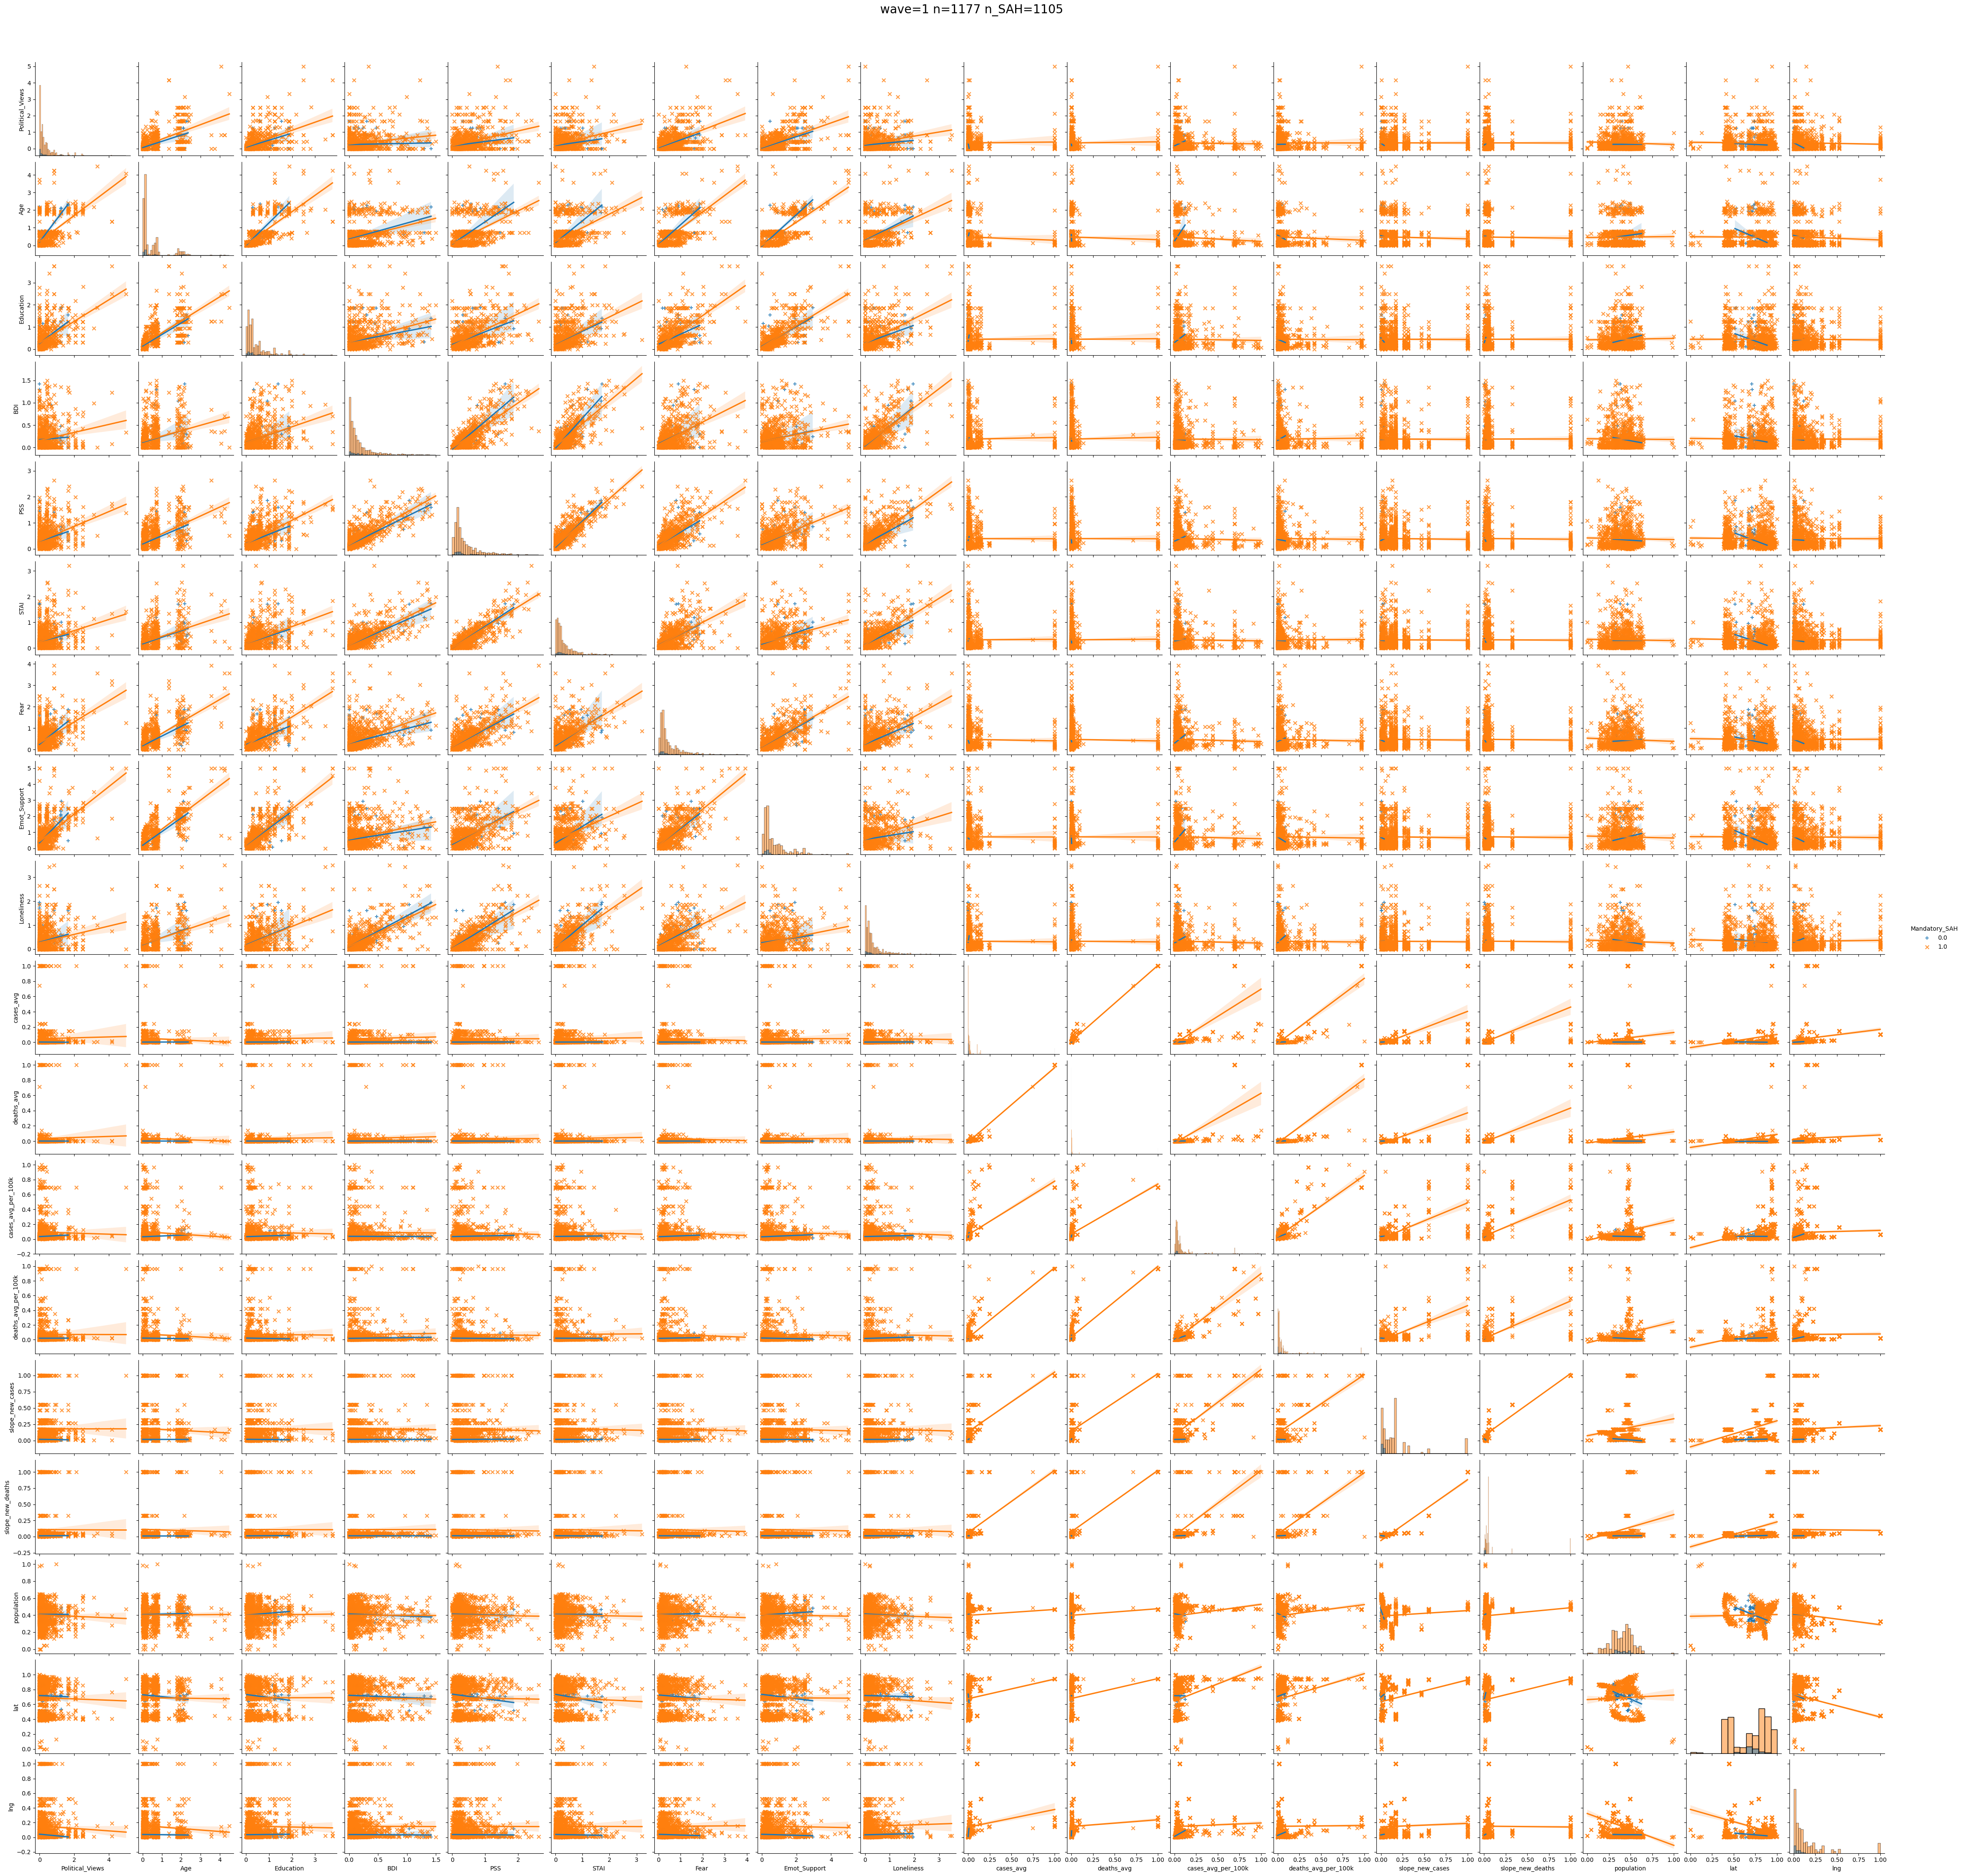

In [14]:
plt.clf()
for i in range(1, 2):
    wave = create_wave_df(full_imputed, i, variable_selected)
    n = wave.shape[0]
    n_SAH = wave.loc[wave['Mandatory_SAH']==1,:].shape[0]
    sns_plt = sns.pairplot(wave, hue='Mandatory_SAH', markers=['+', 'x'], kind='reg', diag_kind='hist')
    sns_plt.fig.subplots_adjust(top=0.95)
    sns_plt.fig.suptitle('wave='+str(i) + ' n='+str(n) + ' n_SAH='+str(n_SAH), fontsize=20)
    sns_plt.savefig("../../output/figures/imputed_corners/"+str(i)+".png")

In [8]:
# load data with raking weights
data = pd.read_csv("../../output/v3_python/core.csv", index_col=0)

<AxesSubplot:xlabel='rake_weights', ylabel='Count'>

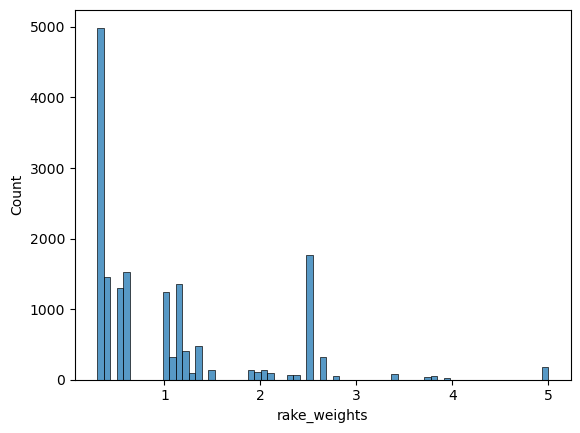

In [10]:
sns.histplot(data['rake_weights'])

In [25]:
tmp = data.loc[data['wave']==1, ['CVDID', 'rake_weights']]

In [23]:
tmp['Mandatory_SAH']

1       1
2       1
3       1
4       1
5       1
       ..
1173    1
1174    1
1175    1
1176    1
1177    1
Name: Mandatory_SAH, Length: 1177, dtype: int64

In [16]:
core_imputed.meta['CVDIDs']

array([   2,    3,    4, ..., 1794, 1795, 1796])

In [19]:
tmp['CVDID'].values


array([   2,    3,    4, ..., 1794, 1795, 1796])

In [20]:
tmp['CVDID'].values

for i in core_imputed.meta['CVDIDs']:
     if i not in tmp['CVDID'].values:
        print(i)

In [21]:
core_imputed.meta['columns']

core_imputed.

['Race_A',
 'Race_AA',
 'Race_W',
 'Gender',
 'Political_Views',
 'Age',
 'Education',
 'BDI',
 'PSS',
 'STAI',
 'Fear',
 'Emot_Support',
 'Loneliness']